In [66]:
#Question 1.1
#Using in-build functions of python
# The data (X1, X2, X3) are for each patient.
# X1 = systolic blood pressure
# X2 = age in years
# X3 = weight in kgs

import pandas as pdS
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import scipy as sp

#Data imported directly from Excel file
df = pd.read_excel('IITHealthCentreData.xlsx')
display(df)
#print(df['X1'].values)

reg= linear_model.LinearRegression()
reg.fit(df[['X2','X3']],df.X1)

b0=reg.intercept_
b1=reg.coef_[0]
b2=reg.coef_[1]

print('Using in-build functions of python')
print('\nIntercept & coefficients')
print('b0=',b0,'\nb1=',b1,'\nb2=',b2)

print('\nMulti-Linear Regression')
print('X1=',b0,'+',b1,'*X2+',b2,'*X3')


X1_pred = reg.predict(df[['X2','X3']])
#print(X1_pred)

n=len(df['X1'])
#print(n)

SR=mean_squared_error(df['X1'],X1_pred)*n
#print(SR)

SE=np.sqrt(SR/(n-3))
print('\nStandard error of estimates=',SE)

CV=sp.stats.variation(df['X1'])*100
print('\n% Coefficient of Variation =',CV)

R=np.sqrt(reg.score(df[['X2','X3']],df.X1))
print('\nCorrelation coefficient(r)    =',R)

,X1,X2,X3
0,132,52,78.369
1,143,59,83.352
2,153,67,87.882
3,162,73,95.583
4,154,64,88.788
5,168,74,99.660
6,137,54,85.164
7,149,61,85.164
8,159,65,93.771
9,128,46,75.651


Using in-build functions of python

Intercept & coefficients
b0= 30.994102952348356 
b1= 0.8614146864683598 
b2= 0.7392035257520749

Multi-Linear Regression
X1= 30.994102952348356 + 0.8614146864683598 *X2+ 0.7392035257520749 *X3

Standard error of estimates= 2.3182111310326117

% Coefficient of Variation = 8.656544990544294

Correlation coefficient(r)    = 0.9883557578879222


Correlation coefficients between X1, X2 and X3

            X1        X2        X3  ones
X1    1.000000  0.978693  0.970564   NaN
X2    0.978693  1.000000  0.946051   NaN
X3    0.970564  0.946051  1.000000   NaN
ones       NaN       NaN       NaN   NaN


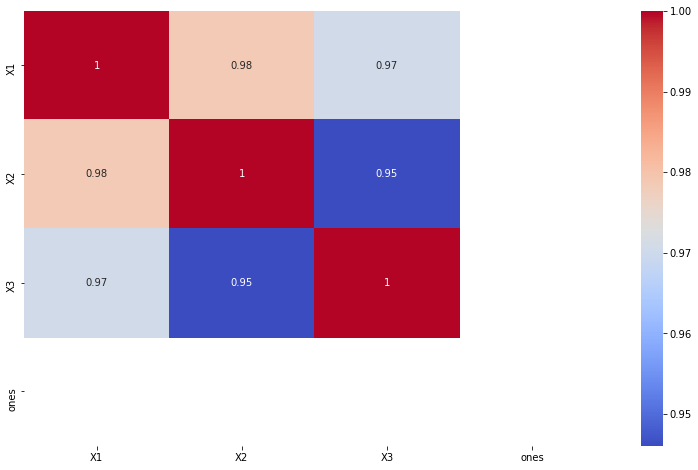

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print('Correlation coefficients between X1, X2 and X3\n') 
print(df.corr())
#print(df.corr()['X1'][0])
cr_true=df.corr()
CR=np.array([cr_true[f'X{i+1}'][j] for i in range(3) for j in range(3)]).reshape(3,3)
#print(CR)

plt.subplots(figsize=(13,8))
#mask = np.zeros_like(df.corr())
#mask[np.triu_indices_from(mask)] = True
#with sns.axes_style("ticks"):
    #p2 = sns.heatmap(df.corr(),cmap='PuOr',annot=True, mask=mask, square=True)

ax=sns.heatmap(df.corr(),cmap='coolwarm',annot=True);

Text(96.0, 0.5, 'X3------->')

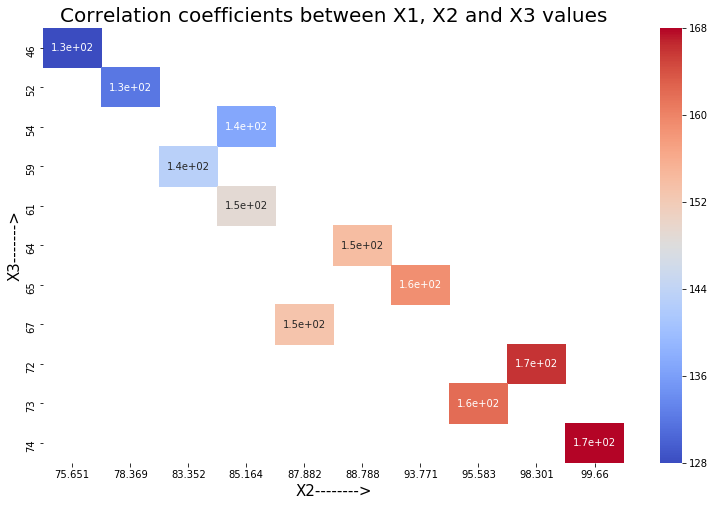

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.subplots(figsize=(13,8))
ax=sns.heatmap(df.pivot('X2','X3','X1'),cmap='coolwarm',annot=True)
ax.set_title('Correlation coefficients between X1, X2 and X3 values',fontsize=20)
ax.set_xlabel('X2-------->',fontsize=15)
ax.set_ylabel('X3------->',fontsize=15)


In [ ]:
#Question 1.2
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

def f(x, y):
    return b0+b1*X2+b2*X3


X2, X3 = np.meshgrid(df['X2'],df['X3'])
X1_pred = f(X2, X3)

fig = plt.figure(figsize=(15,10))
#ax = plt.axes(projection='3d')
#ax.contour3D(X2,X3, X1_pred, 100,cmap='viridis')
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X2,X3, X1_pred,cmap='hsv')

ax.set_title('Multi-linear Regression',fontsize=20)
ax.set_xlabel('X2-------->',fontsize=15)
ax.set_ylabel('X3------->',fontsize=15)
ax.set_zlabel('X1_pred------->',fontsize=15);

In [68]:
#Question 1.3
#Method 1 Using General Linear least Square method to determine coefficients
import pandas as pd
import numpy as np
from scipy import stats

#Data imported directly from Excel file
df = pd.read_excel('IITHealthCentreData.xlsx')
#print(df)
#print(df['X1'])          #this gives me X1 column values 
#print(df[['X1']])        #this gives me X1 column values in array
#print(df['X1'].values)   #this gives me X1 values in list

df['ones'] = 1
Y = df['X1'].values
#print(Y)                
Z = df[['ones','X2', 'X3',]].values
#print(Z)
#print(Z[0][0])

def coeff(Z, Y):
    A = np.linalg.solve( Z.T.dot(Z), Z.T.dot(Y) )
    return A

#print("\ncoeff", coeff(Z, Y).T)


a=[coeff(Z, Y)[i] for i in range(3)]
#print(a)

print("Using Matrix Approach")
for i in range(3):
    print(f'a{i} ={a[i]}')
    
def f(x, y):
    return a[0]+a[1]*X2+a[2]*X3

X2, X3 = (df['X2'].values,df['X3'].values)
X1_new = f(X2, X3)
#print(X1_new)
#print(X1_new.T)
#print(X1_new.mean())

Sr = np.square(np.subtract(df['X1'].values,X1_new)).sum() 
#print(Sr)

n=len(df['X1'])
#print(n)

Se=np.sqrt(Sr/(n-(3)))
print('\nStandard error of estimates =',Se)

St=np.square(np.subtract(df['X1'],df['X1'].mean())).sum()
#St_new=np.square(np.subtract(X1_new,X1_new.mean())).sum()
#print(St)

r=np.sqrt((St-Sr)/St)
print('\nCorrelation coefficient(r)  =',r)

Sy=((np.sqrt(St/n-1)))
#print(Sy)
Cv=(Sy/df['X1'].mean())*100
print('\n%Coefficient of Variation   =',Cv)

z=np.linalg.inv(Z.T.dot(Z))
#print(z)

Sa=[np.sqrt(z[i][i]*Se**2) for i in range(3)]
#print(Sa)

print("\nUsing 95% CI and Degree of freedom = 3")

alpha=0.05
t_int = stats.t.ppf(1-(alpha/2),n-3)
print(f't({alpha}/2,{n-3})=',t_int,'\n')

La=[a[i]-t_int*Sa[i] for i in range(3)]
Ua=[a[i]+t_int*Sa[i] for i in range(3)]

for i in range(3):
    print(f'{La[i]:.14f} < a{i} < {Ua[i]:.14f}')


def crc(X,Y):
    Nr=((n*((X*Y).sum()))-((X.sum())*(Y.sum())))
    Dr=(np.sqrt((n*((X**2).sum())-(np.square(X.sum())))*(n*((Y**2).sum())-(np.square(Y.sum())))))
    cr_XY=Nr/Dr
    return cr_XY

#A=[df['X1'],df['X2'],df['X3']]
#print(A)
#print(A[0])
#cr=np.array([crc(A[i],A[j]) for i in range(3) for j in range(3)]).reshape(3,3)

B=df[['X1','X2', 'X3',]].values
#print(B)
print('\nCorrelation cofficient between X1, X2 and X3')
cr=np.array([crc(B[i],B[j]) for i in range(3) for j in range(3)]).reshape(3,3)
print(cr)


Using Matrix Approach
a0 =30.994102952340413
a1 =0.8614146864681603
a2 =0.7392035257523059

Standard error of estimates = 2.318211131032611

Correlation coefficient(r)  = 0.9883557578879222

%Coefficient of Variation   = 8.630866987740067

Using 95% CI and Degree of freedom = 3
t(0.05/2,8)= 2.3060041350333704 

3.45169598507775 < a0 < 58.53650991960308
0.28899202729070 < a1 < 1.43383734564562
0.07403447367911 < a2 < 1.40437257782550

Correlation cofficient between X1, X2 and X3
[[1.         0.99980001 0.9990246 ]
 [0.99980001 1.         0.99970424]
 [0.9990246  0.99970424 1.        ]]


In [76]:
print('True relative error in')
print('\n1) Coefficients\ta0=',abs((b0-a[0])/b0),'\n\t\ta1=',abs((b1-a[1])/b1),'\n\t\ta2=',abs((b2-a[2])/b2))
print('\n2) Standard error of estimates =',abs((SE-Se)/SE))
print('\n3) % Coefficient of variation  =',abs((CV-Cv)/CV))
print('\n4) Correlation coefficient(r)     =',abs((R-r)/R))
print('\n5) Correlation cofficient between X1, X2 and X3')
cr_err=(CR-cr)
print(cr_err)

True relative error in

1) Coefficients	a0= 2.5630255529612064e-13 
		a1= 2.3160398894878677e-13 
		a2= 3.1239892813969624e-13

2) Standard error of estimates = 3.8313094429173056e-16

3) % Coefficient of variation  = 0.002966310789382568

4) Correlation coefficient(r)     = 0.0

5) Correlation cofficient between X1, X2 and X3
[[ 0.         -0.02110664 -0.02846023]
 [-0.02110664  0.         -0.05365278]
 [-0.02846023 -0.05365278  0.        ]]
